# Pandas
pandas adalah package python yang digunakan untuk load data, data cleaning, dan explore data. data bisa bersifat numerik maupun non-numerik.

ada dua data struktur di package pandas:
- Series (1 dimensi)
- DataFrame (2 dimensi, mirip numpy matrix tapi bisa diberi judul di kolom dan barisnya)

di contoh kali ini, kita akan load data dari file csv dari [source asli](https://github.com/fivethirtyeight/data/tree/master/nba-elo) atau dari [source github personal](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv)

lalu kita akan lakukan data cleaning dan data exploration

In [1]:
import numpy as np
import pandas as pd

## Step 1 - load data
opsi a: secara online langsung dari link ke raw file   
opsi b: secara offline, download dulu file data lalu kita load dari lokasi di foldernya

In [2]:
## secara online
## file csv kita gunakan read_csv
pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [3]:
pd.read_csv('nbaallelo.csv')

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [4]:
## masukkan data ke variable
# karena ini data 2 dimensi, kita masukkan ke DataFrame, aku kasih nama df_penjelasan

df_nba = pd.read_csv('nbaallelo.csv')

In [5]:
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [6]:
# setelah load data, kita bisa lihat informasi tentang data kita menggunakan .info()
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

RangeIndex: 126314 entries, 0 to 126313 --> berapa jumlah baris kita, dan judul2 baris kita   
di data ini, kita punya 126314 baris data. judul nya berupa angka urut dari 0 sampai 126313

Data columns (total 23 columns) --> data kita punya berapa kolom   
di data ini, kita punya 23 kolom data.

`#,   Column,         Non-Null Count,   Dtype  `
- \# angka urut
- Column, judul kolomnya, kalau tidak ada judul otomatis jadi Unnamed:1 jadi pasti ada judul kolom
- Non-Null Count, ada berapa data yang TIDAK kosong di kolom ini. misal kita punya 100 baris di kolom ini tapi hanya 23 yang terisi, maka non-null count jadi 23
- Dtype, tipe data di kolom ini. Jika data numerik semua, otomatis Dtype jadi float64 atau int64. Dtype bisa kita ubah jadi int64, float64, datetime, category. Dtype untuk data non-numerik secara default akan jadi object.

In [15]:
# indexing dan slicing
# misal kita mau ambil data
# khusus untuk 10 baris pertama
# dan kolom date_game, team_id, opp_id, game_result saja
df_nba[0:10]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
5,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,...,43.135952,DTF,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,...,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,...,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
8,5,194611020STB,NBA,1,1947,11/2/1946,1,0,PIT,Ironmen,...,40.507980,STB,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,...,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN


In [16]:
df_nba[["date_game", "team_id", "opp_id", "game_result"]]

,date_game,team_id,opp_id,game_result
0,11/1/1946,TRH,NYK,L
1,11/1/1946,NYK,TRH,W
2,11/2/1946,CHS,NYK,W
3,11/2/1946,NYK,CHS,L
4,11/2/1946,DTF,WSC,L
...,...,...,...,...
126309,6/11/2015,CLE,GSW,L
126310,6/14/2015,GSW,CLE,W
126311,6/14/2015,CLE,GSW,L
126312,6/16/2015,CLE,GSW,L


In [17]:
# tambahan kalau mau pilih baris DAN kolom kita gunakan .loc untuk pandas dataframe
df_nba.loc[0:10, ["date_game", "team_id", "opp_id", "game_result"]]

,date_game,team_id,opp_id,game_result
0,11/1/1946,TRH,NYK,L
1,11/1/1946,NYK,TRH,W
2,11/2/1946,CHS,NYK,W
3,11/2/1946,NYK,CHS,L
4,11/2/1946,DTF,WSC,L
5,11/2/1946,WSC,DTF,W
6,11/2/1946,BOS,PRO,L
7,11/2/1946,PRO,BOS,W
8,11/2/1946,PIT,STB,L
9,11/2/1946,STB,PIT,W


biasanya untuk analisa data, kita mau explore dulu raw datanya, biar tau apa yang kira2 bisa di analisa.

apakah tim mana yang paling banyak menang?

apakah tim tertentu (misalkan PIT) win ratio nya tinggi diatas 50%?

apakah tim tertentu (misalkan BOS) skor nya biasanya lebih tinggi dibandingkan tim tertentu (misalkan LAL)


### teknik data exploration
- info
- slicing, index dan .loc
- head, tail, ngambil beberapa baris awal/akhir saja
- ubah judul kolom, drop kolom, drop baris, judul baris
- ngambil baris2 data tertentu menggunakan conditional
- dan lainnya

In [21]:
df_nba.head(3) # kalau tidak diisi dia ambil 5 baris pertama

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


In [22]:
df_nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN


In [23]:
# kolomnya apa saja sih
df_nba.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [25]:
# kita bisa rename
df_nba.rename(columns={"lg_id":"lg", "fran_id":"team_name", "opp_fran":"opp_name"})

# hati hati, rename tidak menimpa data awal df_nba, jadi kalau mau disimpan, kita perlu re-assign variable nya

,gameorder,game_id,lg,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,team_name,...,win_equiv,opp_id,opp_name,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [26]:
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [27]:
df_nba = df_nba.rename(columns={"lg_id":"lg", "fran_id":"team_name", "opp_fran":"opp_name"})

In [28]:
df_nba.head()

,gameorder,game_id,lg,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,team_name,...,win_equiv,opp_id,opp_name,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [29]:
# mengambil baris tertentu
# kita bisa buat dulu kondisinya
# misalkan, khusus games di tahun 2010
# query
kondisi = (df_nba["year_id"] == 2010)

kondisi

0         False
1         False
2         False
3         False
4         False
          ...  
126309    False
126310    False
126311    False
126312    False
126313    False
Name: year_id, Length: 126314, dtype: bool

In [31]:
# kumpulan boolean itu kita jadikan index
df_nba_2010 = df_nba[kondisi]
df_nba_2010.head()

,gameorder,game_id,lg,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,team_name,...,win_equiv,opp_id,opp_name,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
111032,55517,200910270CLE,NBA,1,2010,10/27/2009,1,0,BOS,Celtics,...,53.780228,CLE,Cavaliers,89,1682.4541,1669.5657,A,W,0.277472,NaN
111033,55517,200910270CLE,NBA,0,2010,10/27/2009,1,0,CLE,Cavaliers,...,57.480888,BOS,Celtics,95,1616.2000,1629.0884,H,L,0.722528,NaN
111034,55518,200910270DAL,NBA,1,2010,10/27/2009,1,0,WAS,Wizards,...,29.191736,DAL,Mavericks,91,1586.4293,1560.6396,A,W,0.133436,NaN
111035,55518,200910270DAL,NBA,0,2010,10/27/2009,1,0,DAL,Mavericks,...,46.996815,WAS,Wizards,102,1361.4187,1387.2084,H,L,0.866564,NaN
111036,55519,200910270LAL,NBA,1,2010,10/27/2009,1,0,LAC,Clippers,...,22.856619,LAL,Lakers,99,1718.7451,1719.3817,A,L,0.052993,NaN


In [32]:
df_nba_2010.shape

(2624, 23)

In [34]:
# kita bandingkan Celtics dan Cavaliers di tahun 2010, siapa menang lebih banyak
k1 = (df_nba_2010["team_name"] == "Celtics")
k2 = (df_nba_2010["team_name"] == "Cavaliers")

df_nba_2010_celtics_cavaliers = df_nba_2010[k1 | k2]
df_nba_2010_celtics_cavaliers

,gameorder,game_id,lg,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,team_name,...,win_equiv,opp_id,opp_name,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
111032,55517,200910270CLE,NBA,1,2010,10/27/2009,1,0,BOS,Celtics,...,53.780228,CLE,Cavaliers,89,1682.4541,1669.5657,A,W,0.277472,NaN
111033,55517,200910270CLE,NBA,0,2010,10/27/2009,1,0,CLE,Cavaliers,...,57.480888,BOS,Celtics,95,1616.2000,1629.0884,H,L,0.722528,NaN
111043,55522,200910280BOS,NBA,0,2010,10/28/2009,2,0,BOS,Celtics,...,54.458897,CHA,Hornets,59,1471.9324,1464.7241,H,W,0.814619,NaN
111062,55532,200910280TOR,NBA,1,2010,10/28/2009,2,0,CLE,Cavaliers,...,56.129284,TOR,Raptors,101,1453.2251,1468.3621,A,L,0.661438,NaN
111070,55536,200910300BOS,NBA,0,2010,10/30/2009,3,0,BOS,Celtics,...,55.224873,CHI,Bulls,90,1527.5923,1519.3502,H,W,0.768774,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113646,56824,201006080BOS,NBA,0,2010,6/8/2010,102,1,BOS,Celtics,...,57.441845,LAL,Lakers,91,1679.3888,1691.1460,H,L,0.642039,NaN
113648,56825,201006100BOS,NBA,0,2010,6/10/2010,103,1,BOS,Celtics,...,57.981575,LAL,Lakers,89,1691.1460,1684.9752,H,W,0.610370,NaN
113651,56826,201006130BOS,NBA,0,2010,6/13/2010,104,1,BOS,Celtics,...,58.446255,LAL,Lakers,86,1684.9752,1679.5972,H,W,0.627127,NaN
113652,56827,201006150LAL,NBA,1,2010,6/15/2010,105,1,BOS,Celtics,...,57.426167,LAL,Lakers,89,1679.5972,1691.3241,A,L,0.361360,NaN


In [44]:
## value counts
df_nba_2010_celtics_cavaliers["team_name"].value_counts()


Celtics      106
Cavaliers     93
Name: team_name, dtype: int64

In [45]:
df_nba_2010_celtics_cavaliers[["team_name", "game_result"]].value_counts()

team_name  game_result
Cavaliers  W              67
Celtics    W              65
           L              41
Cavaliers  L              26
dtype: int64

In [46]:
df_nba_2010_celtics_cavaliers.groupby("game_result")["team_name"].value_counts()

game_result  team_name
L            Celtics      41
             Cavaliers    26
W            Cavaliers    67
             Celtics      65
Name: team_name, dtype: int64

In [47]:
df_nba_2010_celtics_cavaliers.groupby("team_name")["game_result"].value_counts()

team_name  game_result
Cavaliers  W              67
           L              26
Celtics    W              65
           L              41
Name: game_result, dtype: int64

<AxesSubplot:xlabel='team_name,game_result'>

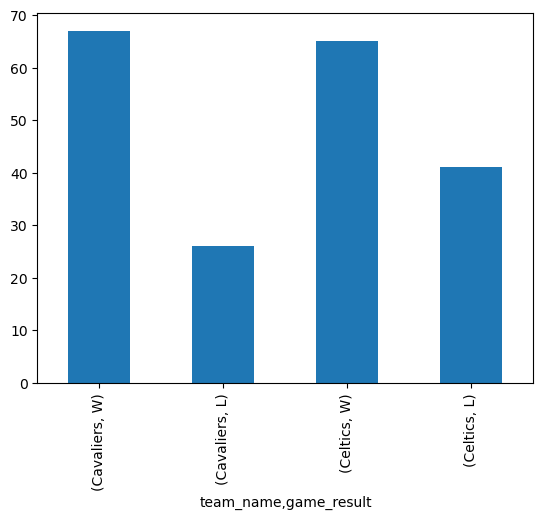

In [52]:
df_nba_2010_celtics_cavaliers.groupby("team_name")["game_result"].value_counts().plot(kind="bar")

dari data diatas sepertinya Cavaliers lebih sering menang dan lebih jarang kalah, tim yang lebih baik daripada Celtics di tahun 2010